## Reading Input

In [1]:
import pandas as pd
from proj_utils.input_interpreter import format_input

In [2]:
customer_df = pd.read_excel('data/2_detail_table_customers.xls')
deposit_df = pd.read_excel('data/4_detail_table_depots.xls')
routes = customer_df['ROUTE_ID'].unique()

# Simulated Annealing Solution

In [3]:
from proj_utils.fake_input_generator import generator as fake_generator
import simulated_annealing.solvers as SA # VRP_solver_factory
from proj_utils.path import print_path
from proj_utils.path import split_paths
from proj_utils.path import total_path_value
import matplotlib.pyplot as plt

%matplotlib widget

In [4]:
vehicle_capacity = (2000,10,float('inf'))
adjacency_matrix, demand_list, delivery_window_list,points = format_input(routes[7], customer_df, deposit_df)

In [5]:
solver = SA.VRP_solver_factory(adjacency_matrix, demand_list, delivery_window_list, vehicle_capacity)

In [6]:
sol, history = solver(10000)

[0, 112, 102, 87, 77, 39, 100, 92, 21, 62, 53, 105, 42, 95, 22, 11, 52, 67, 9, 74, 40, 73, 26, 96, 0]
[0, 6, 78, 90, 10, 29, 31, 15, 38, 37, 115, 5, 24, 104, 8, 12, 94, 3, 114, 33, 68, 54, 0]
[0, 43, 25, 23, 82, 47, 28, 0]
[0, 75, 97, 16, 80, 1, 30, 109, 113, 32, 85, 63, 48, 18, 107, 111, 61, 66, 69, 36, 70, 71, 98, 0]
[0, 110, 91, 20, 45, 44, 57, 106, 81, 58, 60, 19, 56, 49, 72, 64, 88, 7, 101, 41, 89, 0]
[0, 93, 2, 51, 59, 103, 35, 86, 46, 14, 27, 55, 50, 76, 17, 79, 65, 34, 99, 4, 84, 83, 13, 108, 0]
33.31591916681779


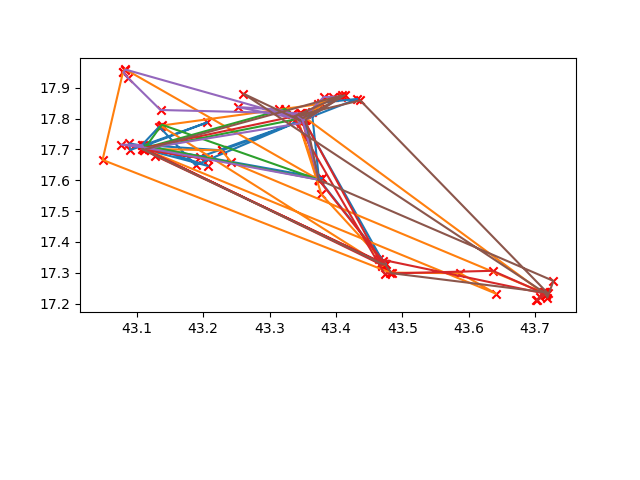

In [7]:
print_path(points, sol)
for i in split_paths(sol):
    print(i)
print(total_path_value(sol,adjacency_matrix))

In [8]:
history.keys()

dict_keys(['temperature', 'current_energy', 'state'])

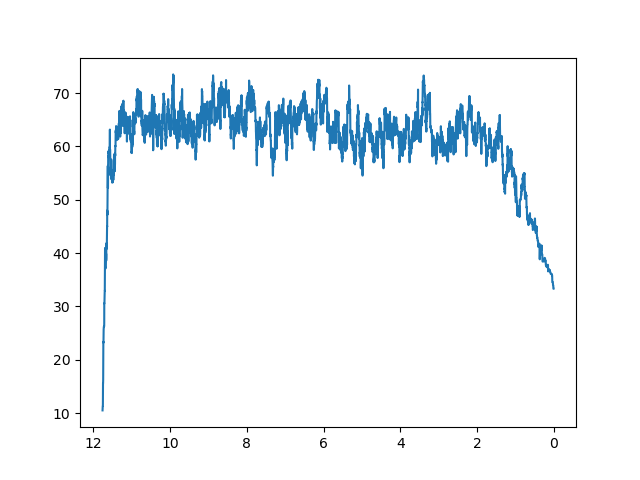

In [9]:
energy_fig, energy_ax = plt.subplots()
energy_ax.plot(history['temperature'][:],history['current_energy'][:])
energy_ax.invert_xaxis()